In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from arch import arch_model

In [2]:
btc = yf.download('BTC-USD')
btc_ret = btc['Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


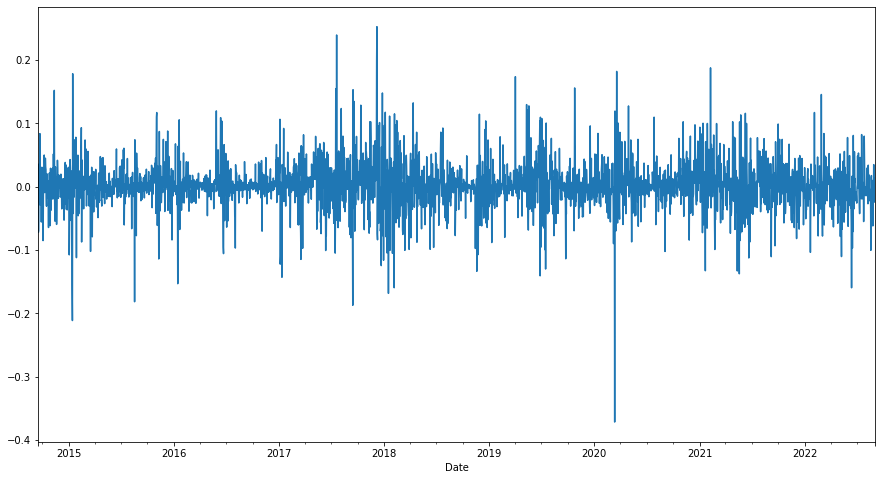

In [8]:
btc_ret.plot(figsize=(15,8))

In [63]:
def GetMovingAverage(data, window_size):
    avg_arr = pd.Series()
    for i in range(len(data) - window_size):
        add = pd.Series(data.iloc[i:window_size+i].mean(), index=[i])
        avg_arr = avg_arr.append(add)

    # avg_arr = pd.Series([data.iloc[i:window_size+i].mean() for i in range(len(data) - window_size)])
        
    return avg_arr

def GetMovingSTD(data, avg_arr, window_size):
    data_ret = data.pct_change()[1:]
    std_arr = pd.Series()
    for i in range(len(data_ret) - window_size):
        add = pd.Series(data_ret.iloc[i:window_size+i].mean())
        std_arr = std_arr.append(add)
        
    # std_arr = pd.Series([data_ret.iloc[i:window_size+i].mean() for i in range(len(data_ret) - window_size)])
        
    return std_arr


#def EGARCH():
    


In [64]:
def ExtractData(data, avg_window_size, std_window_size):
    avg_arr = GetMovingAverage(data, avg_window_size)
    std_arr = GetMovingSTD(data, avg_arr, std_window_size)
    
    return (avg_arr, std_arr)#, stat_process, cond_vlolatility)

In [65]:
btc['Close']

Date
2014-09-17      457.334015
2014-09-18      424.440002
2014-09-19      394.795990
2014-09-20      408.903992
2014-09-21      398.821014
                  ...     
2022-08-31    20049.763672
2022-09-01    20127.140625
2022-09-02    19969.771484
2022-09-03    19832.087891
2022-09-04    19665.031250
Name: Close, Length: 2910, dtype: float64

In [66]:
result = ExtractData(btc['Close'], avg_window_size=10, std_window_size=10)

/Users/ivanlebed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/Users/ivanlebed/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


In [68]:
result

(0         416.144199
 1         410.362796
 2         405.636896
 3         403.703998
 4         401.507999
             ...     
 2895    20747.041602
 2896    20598.605859
 2897    20471.429102
 2898    20315.597461
 2899    20159.304297
 Length: 2900, dtype: float64,
 0   -0.012455
 0   -0.010854
 0   -0.004325
 0   -0.004841
 0   -0.003236
        ...   
 0   -0.006343
 0   -0.006804
 0   -0.005790
 0   -0.007176
 0   -0.007247
 Length: 2899, dtype: float64)

In [ ]:
# grab Microsoft daily adjusted close price data from '01-03-2013' to '12-06-2018' and store it in DataFrame
#df = pd.DataFrame(web.get_data_yahoo('MSFT' , start='01-03-2013' , end='12-06-2018')['Adj Close'])

# calculate daily rate of return that is necessary for predicting daily Volatility by EGARCH
#daily_rate_of_return_EGARCH = np.log(df.loc[ : '01-04-2015']/df.loc[ : '01-04-2015'].shift())
# drop NaN values
#daily_rate_of_return_EGARCH = daily_rate_of_return_EGARCH.dropna()

# Volatility Forecasting By EGARCH(1,1)

# model_EGARCH = arch_model(daily_rate_of_return_EGARCH, vol='EGARCH' , p = 1 , o = 0 , q = 1)

model_EGARCH = arch_model(result[1], vol='EGARCH' , p = 1 , o = 0 , q = 1)

fitted_EGARCH = model_EGARCH.fit(disp='off')

# and finally, Forecasting step
# Note that as mentioned in `purpose` section, predict interval should be from '01-04-2015' to end of the data frame
horizon = len(result[1])#.loc['01-04-2015' : ])
volatility_FORECASTED = fitted_EGARCH.forecast(horizon = horizon , method='simulation')


/Users/ivanlebed/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001537. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/Users/ivanlebed/opt/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
